In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# File to Load (Remember to Change These)
file_to_load1 = "Air-Travel-Throughput2.csv"
file_to_load2 = "covid-data.csv"

# Read Files and store into Pandas data frame
air_data = pd.read_csv(file_to_load1)
covid_data = pd.read_csv(file_to_load2)

In [32]:
air_data

,Date,Total Traveler Throughput 2020,Total Traveler Throughput 2019
0,3/1,2280522,2301439
1,3/2,2089641,2257920
2,3/3,1736393,1979558
3,3/4,1877401,2143619
4,3/5,2130015,2402692
...,...,...,...
241,10/28,666957,2066516
242,10/29,873636,2047910
243,10/30,892712,2319906
244,10/31,618476,1836781


In [33]:
covid_data = covid_data.rename(columns = {"date":"Date"}) 
covid_data

,Date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,11/1,222710.0,391,24457.0,9553.0,1154,47520.0,476228.0,120857751,756946,2797.0,2553.0,9152404,74181,3630627.0,56,147248089,1079944
1,10/31,222319.0,963,24375.0,9499.0,2074,47375.0,475074.0,120100805,1039157,2786.0,2502.0,9078223,90592,3612517.0,56,146168145,1373918
2,10/30,221356.0,933,24230.0,9437.0,2421,46688.0,473000.0,119061648,980084,2776.0,2477.0,8987631,97080,3578452.0,56,144794227,1362376
3,10/29,220423.0,1049,24082.0,9208.0,2292,46095.0,470579.0,118081564,1008042,2760.0,2403.0,8890551,88452,3554336.0,56,143431851,1325104
4,10/28,219374.0,1025,23883.0,9034.0,2510,45045.0,468287.0,117073522,797077,2744.0,2347.0,8802099,78661,3518140.0,56,142106747,1085647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,1/26,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
281,1/25,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
282,1/24,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
283,1/23,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,1


In [34]:
data = pd.merge(air_data, covid_data, how='inner', on='Date')
data = data.set_index('Date')
data

,Total Traveler Throughput 2020,Total Traveler Throughput 2019,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
Date,,,,,,,,,,,,,,,,,,,
3/1,2280522,2301439,8.0,3,NaN,NaN,0,NaN,NaN,85,61,NaN,NaN,50,32,NaN,9,6660,108
3/2,2089641,2257920,11.0,3,NaN,NaN,0,NaN,NaN,243,158,NaN,NaN,94,44,NaN,9,6872,212
3/3,1736393,1979558,14.0,3,NaN,NaN,0,NaN,NaN,446,203,NaN,NaN,144,50,NaN,11,7163,291
3/4,1877401,2143619,16.0,2,NaN,NaN,4,NaN,4.0,1417,971,NaN,NaN,282,138,NaN,22,8248,1085
3/5,2130015,2402692,20.0,4,NaN,NaN,1,NaN,5.0,1949,532,NaN,NaN,386,104,NaN,28,8909,661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/28,666957,2066516,219374.0,1025,23883.0,9034.0,2510,45045.0,468287.0,117073522,797077,2744.0,2347.0,8802099,78661,3518140.0,56,142106747,1085647
10/29,873636,2047910,220423.0,1049,24082.0,9208.0,2292,46095.0,470579.0,118081564,1008042,2760.0,2403.0,8890551,88452,3554336.0,56,143431851,1325104
10/30,892712,2319906,221356.0,933,24230.0,9437.0,2421,46688.0,473000.0,119061648,980084,2776.0,2477.0,8987631,97080,3578452.0,56,144794227,1362376


In [35]:
new_cases = data['positiveIncrease']
new_tests = data['totalTestResultsIncrease'].astype(float)
new_tests2 = new_tests/5
new_deaths = data['deathIncrease']
percent_positive = (new_cases / new_tests)*100


In [36]:
travel_19 = data['Total Traveler Throughput 2019']
travel_20 = data['Total Traveler Throughput 2020']
travel_effect1 = travel_19 - travel_20
travel_effect = -1*(travel_19 - travel_20)

data1 = pd.DataFrame({"Date": data.index, "New Cases": new_cases, "New Tests": new_tests, "Percent Positive": percent_positive, "New Deaths": new_deaths,"Travel 2019": travel_19, "Travel 2020": travel_20,"Travel Effect": travel_effect,"Travel Effect1": travel_effect1,"Currently Hospitalized": data['hospitalizedCurrently'], "Currently in ICU": data['inIcuCurrently'], "Recovered": data['recovered'], "New Tests / 2": new_tests2})
data1

,Date,New Cases,New Tests,Percent Positive,New Deaths,Travel 2019,Travel 2020,Travel Effect,Travel Effect1,Currently Hospitalized,Currently in ICU,Recovered,New Tests / 2
Date,,,,,,,,,,,,,
3/1,3/1,32,108.0,29.629630,3,2301439,2280522,-20917,20917,NaN,NaN,NaN,21.6
3/2,3/2,44,212.0,20.754717,3,2257920,2089641,-168279,168279,NaN,NaN,NaN,42.4
3/3,3/3,50,291.0,17.182131,3,1979558,1736393,-243165,243165,NaN,NaN,NaN,58.2
3/4,3/4,138,1085.0,12.718894,2,2143619,1877401,-266218,266218,NaN,NaN,NaN,217.0
3/5,3/5,104,661.0,15.733737,4,2402692,2130015,-272677,272677,NaN,NaN,NaN,132.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/28,10/28,78661,1085647.0,7.245541,1025,2066516,666957,-1399559,1399559,45045.0,9034.0,3518140.0,217129.4
10/29,10/29,88452,1325104.0,6.675099,1049,2047910,873636,-1174274,1174274,46095.0,9208.0,3554336.0,265020.8
10/30,10/30,97080,1362376.0,7.125786,933,2319906,892712,-1427194,1427194,46688.0,9437.0,3578452.0,272475.2


Text(0.5, 1.0, 'New Deaths')

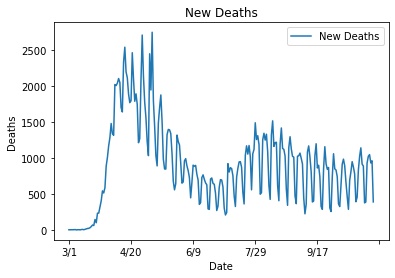

In [70]:
data1[['New Deaths']].plot()
plt.ylabel("Deaths")
plt.title("New Deaths")

Text(0.5, 1.0, 'Cases Per Day')

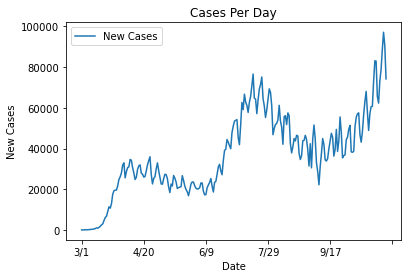

In [71]:
data1[['New Cases',]].plot()
plt.ylabel("New Cases")
plt.title("Cases Per Day")

Text(0.5, 1.0, 'Hospitalized')

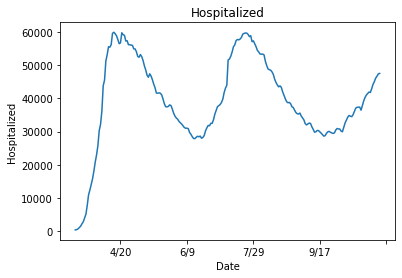

In [72]:
data1['Currently Hospitalized'].plot()
plt.ylabel("Hospitalized")
plt.title("Hospitalized")

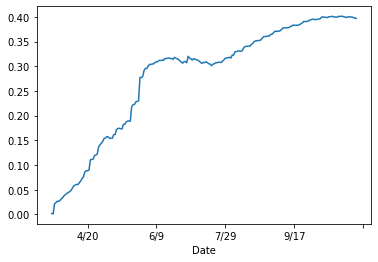

In [40]:
recovered_rate = data1['Recovered'] / data['positive']

recovered_rate.plot()

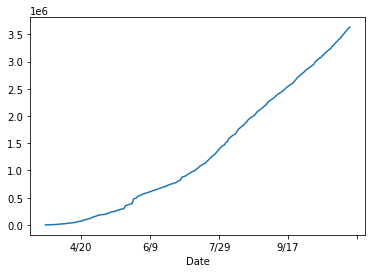

In [41]:
data1['Recovered'].plot()

In [42]:
data1['Travel Effect'] = data1['Travel Effect'].rolling(window=3).mean()
data1.head(20)


,Date,New Cases,New Tests,Percent Positive,New Deaths,Travel 2019,Travel 2020,Travel Effect,Travel Effect1,Currently Hospitalized,Currently in ICU,Recovered,New Tests / 2
Date,,,,,,,,,,,,,
3/1,3/1,32,108.0,29.629630,3,2301439,2280522,NaN,20917,NaN,NaN,NaN,21.6
3/2,3/2,44,212.0,20.754717,3,2257920,2089641,NaN,168279,NaN,NaN,NaN,42.4
3/3,3/3,50,291.0,17.182131,3,1979558,1736393,-1.441203e+05,243165,NaN,NaN,NaN,58.2
3/4,3/4,138,1085.0,12.718894,2,2143619,1877401,-2.258873e+05,266218,NaN,NaN,NaN,217.0
3/5,3/5,104,661.0,15.733737,4,2402692,2130015,-2.606867e+05,272677,NaN,NaN,NaN,132.2
3/6,3/6,113,880.0,12.840909,6,2543689,2198517,-2.946890e+05,345172,NaN,NaN,NaN,176.0
3/7,3/7,173,968.0,17.871901,1,2156262,1844811,-3.097667e+05,311451,NaN,NaN,NaN,193.6
3/8,3/8,199,1002.0,19.860279,4,2485430,2119867,-3.407287e+05,365563,NaN,NaN,NaN,200.4
3/9,3/9,292,1905.0,15.328084,4,2378673,1909363,-3.821080e+05,469310,NaN,NaN,NaN,381.0


Text(0.5, 1.0, 'Travel Effect 2020 vs 2019')

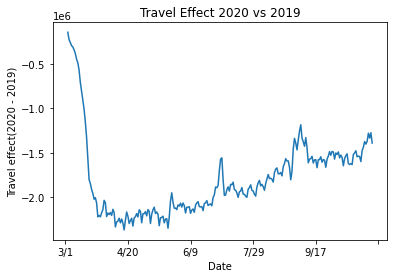

In [68]:
data1['Travel Effect'].plot()
plt.ylabel("Travel effect(2020 - 2019)")
plt.title("Travel Effect 2020 vs 2019")


Text(0.5, 1.0, 'Percent positive')

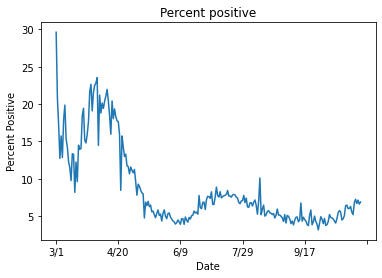

In [69]:
data1['Percent Positive'].plot()
plt.ylabel("Percent Positive")
plt.title("Percent positive")

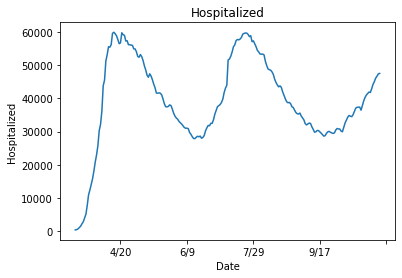

In [66]:
data1['Currently Hospitalized'].plot()
plt.ylabel("Hospitalized")
plt.title("Hospitalized")
plt.show()

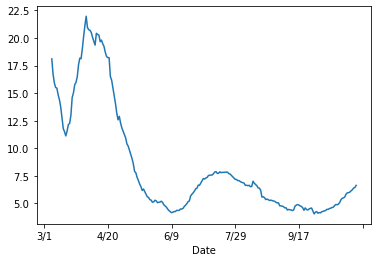

In [46]:
rolling_positive = data1['Percent Positive'].rolling(window=7).mean()
rolling_positive.plot()


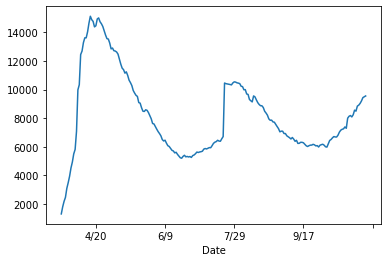

In [47]:
data1['Currently in ICU'].plot()

Text(0.5, 1.0, 'Negative Travel Effect')

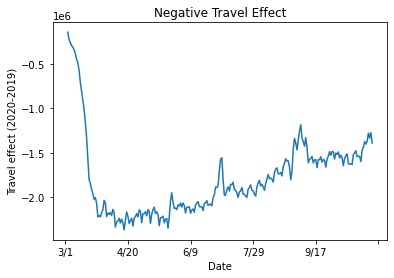

In [75]:
data1['Travel Effect'].plot()
plt.ylabel("Travel effect (2020-2019)")
plt.title("Negative Travel Effect")

Text(0, 0.5, 'Total Travelers(Millions)')

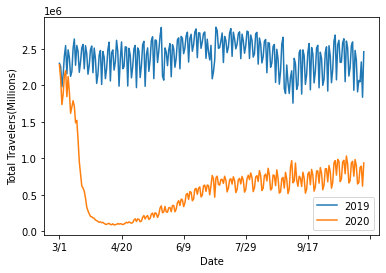

In [49]:
travel_19 = data['Total Traveler Throughput 2019'].rolling(window=1).mean()
travel_20 = data['Total Traveler Throughput 2020'].rolling(window=1).mean()
data2 = pd.DataFrame({"Date": data.index,"2019": travel_19, "2020": travel_20})
data2.plot()
plt.ylabel("Total Travelers(Millions)")
plt.title("New Cases vs New Tests")
plt.show()
#labor day business vs lesure


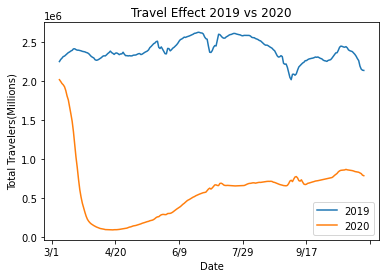

In [65]:
travel_19 = data['Total Traveler Throughput 2019'].rolling(window=7).mean()
travel_20 = data['Total Traveler Throughput 2020'].rolling(window=7).mean()
data2 = pd.DataFrame({"Date": data.index,"2019": travel_19, "2020": travel_20})
data2.plot()
plt.ylabel("Total Travelers(Millions)")
plt.title("Travel Effect 2019 vs 2020")
plt.show()

#labor day business vs lesure

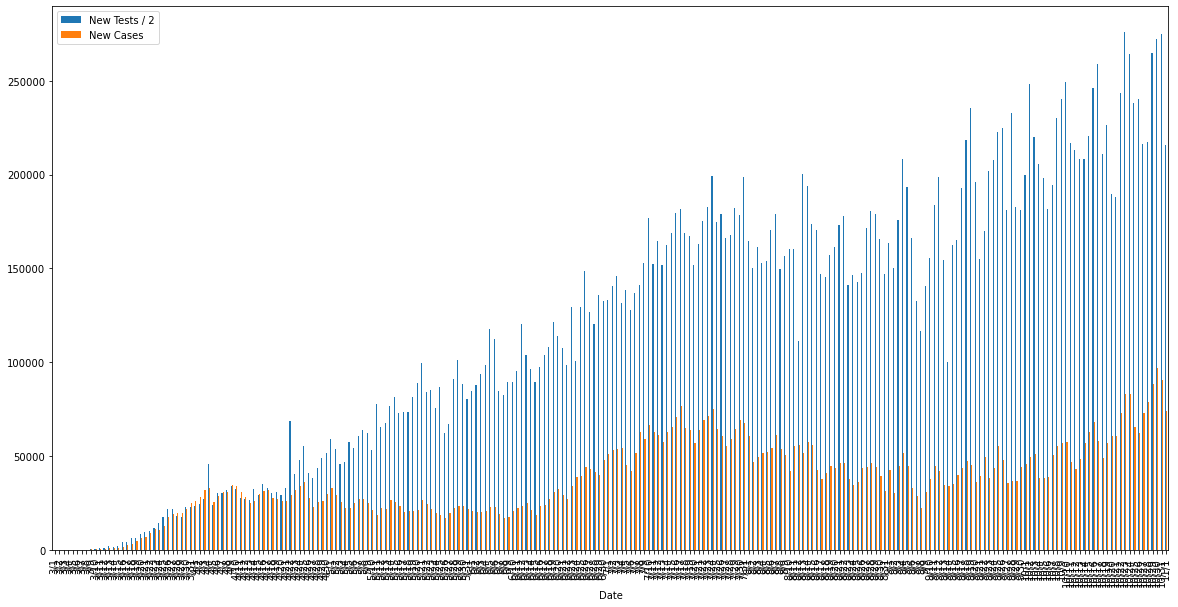

In [51]:
data1[['New Tests / 2','New Cases']].plot(kind='bar', figsize=(20,10))


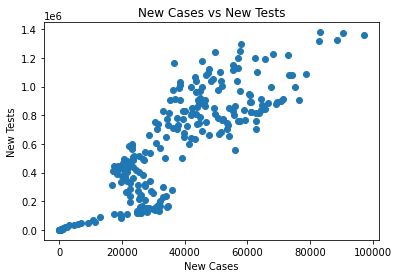

Correlation: 0.8478679668573521


In [52]:
plt.scatter(data1['New Cases'],data1['New Tests'])
plt.xlabel("New Cases")
plt.ylabel("New Tests")
plt.title("New Cases vs New Tests")
plt.show()
correlation = st.pearsonr(data1['New Cases'],data1['New Tests'])
print(f"Correlation: {correlation[0]}")

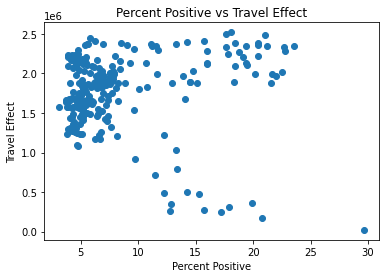

Correlation: 0.015230898041739521


In [53]:
plt.scatter(data1['Percent Positive'],data1['Travel Effect1'])
plt.xlabel("Percent Positive")
plt.ylabel("Travel Effect")
plt.title("Percent Positive vs Travel Effect")
plt.show()
correlation = st.pearsonr(data1['Percent Positive'],data1['Travel Effect1'])
print(f"Correlation: {correlation[0]}")

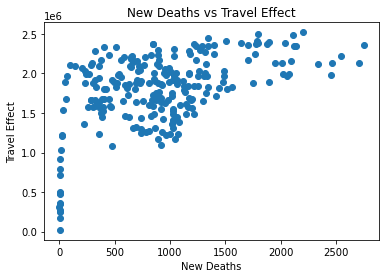

Correlation: 0.5251214412472307


In [54]:
plt.scatter(data1['New Deaths'],data1['Travel Effect1'])
plt.xlabel("New Deaths")
plt.ylabel("Travel Effect")
plt.title("New Deaths vs Travel Effect")
plt.show()
correlation = st.pearsonr(data1['New Deaths'],data1['Travel Effect1'])
print(f"Correlation: {correlation[0]}")

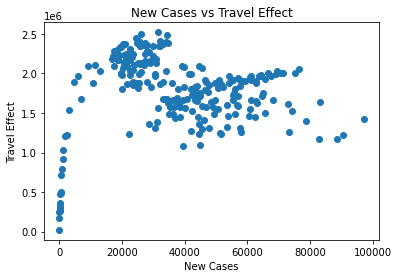

Correlation: 0.06525001455609808


In [55]:
plt.scatter(data1['New Cases'],data1['Travel Effect1'])
plt.xlabel("New Cases")
plt.ylabel("Travel Effect")
plt.title("New Cases vs Travel Effect")
plt.show()
correlation = st.pearsonr(data1['New Cases'],data1['Travel Effect1'])
print(f"Correlation: {correlation[0]}")

In [56]:
hosp = pd.DataFrame({"Date": data1.index,"Hospitalized": data1['Currently Hospitalized'], "Travel Effect": data1['Travel Effect1']})
hosp = hosp.dropna()


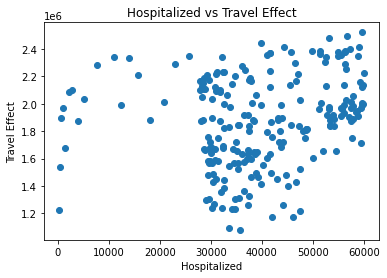

Correlation: 0.19991849498763048


In [57]:
plt.scatter(hosp['Hospitalized'],hosp['Travel Effect'])
plt.xlabel("Hospitalized")
plt.ylabel("Travel Effect")
plt.title("Hospitalized vs Travel Effect")
plt.show()
correlation = st.pearsonr(hosp['Hospitalized'],hosp['Travel Effect'])
print(f"Correlation: {correlation[0]}")

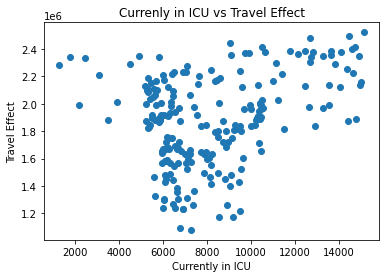

Correlation: 0.3264098519439247


In [59]:
icu = pd.DataFrame({"Date": data1.index,"Currently in ICU": data1['Currently in ICU'], "Travel Effect": data1['Travel Effect1']})
icu = icu.dropna()

plt.scatter(icu['Currently in ICU'],icu['Travel Effect'])
plt.xlabel("Currently in ICU")
plt.ylabel("Travel Effect")
plt.title("Currenly in ICU vs Travel Effect")
plt.show()
correlation = st.pearsonr(icu['Currently in ICU'],icu['Travel Effect'])
print(f"Correlation: {correlation[0]}")

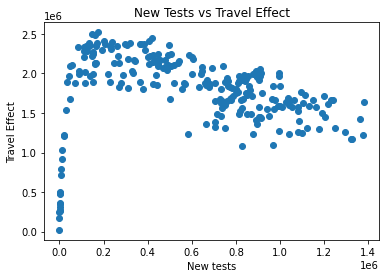

Correlation: -0.12623754726640665


In [81]:
plt.scatter(data1['New Tests'],data1['Travel Effect1'])
plt.xlabel("New tests")
plt.ylabel("Travel Effect")
plt.title("New Tests vs Travel Effect")
plt.show()
correlation = st.pearsonr(data1['New Tests'],data1['Travel Effect1'])
print(f"Correlation: {correlation[0]}")

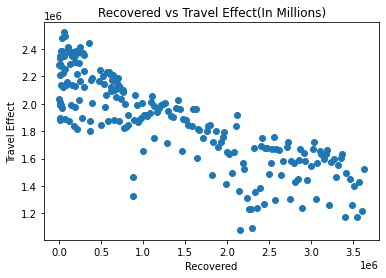

Correlation: -0.8360895525316859


In [79]:
rec = pd.DataFrame({"Date": data1.index,"Recovered": data1['Recovered'], "Travel Effect": data1['Travel Effect1']})
rec = rec.dropna()

plt.scatter(rec['Recovered'],rec['Travel Effect'])
plt.xlabel("Recovered")
plt.ylabel("Travel Effect")
plt.title("Recovered vs Travel Effect(In Millions)")
plt.show()
correlation = st.pearsonr(rec['Recovered'],rec['Travel Effect'])
print(f"Correlation: {correlation[0]}")